In [ ]:
UNAD
John Sebastian Escobar Uchima
Predecir la enfermedad cardiaca Regresión loguística

In [ ]:
Pasos de la Actividad

1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo.
5. Entrenar el modelo configurando los diferentes
hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.
9. Crear una cuenta en GitHub y cargar los códigos de los modelos
diseñados https://github.com/

In [ ]:
#1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [176]:
#Cargar las librerias requeridas

import pandas as pd # Manejor y análisis de estructura de datos
import numpy as np # Calculo numérico y el análisis de datos
import seaborn as sns # Creación graficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en 2 dimensiones

#Librerias para implementar modelos de ciencia de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import zscore
import math

import warnings
warnings.filterwarnings("ignore")

# Los archivos de datos de entrada están disponibles en el directorio de solo lectura "../input/"
# Por ejemplo, ejecutar esto (haciendo clic en ejecutar o presionando Shift+Enter) enumerará todos los archivos en el directorio de entrada

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Puedes escribir hasta 20 GB en el directorio actual (/kaggle/working/) que se conserva como salida cuando creas una versión usando "Guardar y ejecutar todo"
# También puedes escribir archivos temporales en /kaggle/temp/, pero no se guardarán fuera de la sesión actual

In [177]:
#Lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('D:/Tareas/7 semestre/Analisis de datos/archive/Car details v3.csv')

In [178]:
#Realizamos lestura de los datos para el analisis exploratorio

Datos.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [179]:
#Transformación de algunos datos a numericos

Datos['mileage']=Datos['mileage'].replace(' kmpl','',regex=True).str.replace(',', '')
Datos['mileage']=Datos['mileage'].replace(' km/kg','',regex=True).str.replace(',', '')
Datos['engine']=Datos['engine'].replace(' CC','',regex=True).str.replace(',', '')
Datos['max_power']=Datos['max_power'].replace(' bhp','',regex=True).str.replace(',', '')

Datos['mileage'] = pd.to_numeric(Datos['mileage'])
Datos['engine'] = pd.to_numeric(Datos['engine'])
Datos['max_power'] = pd.to_numeric(Datos['max_power'])
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


In [180]:
#Descripción de los datos

Datos.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,35.822499,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

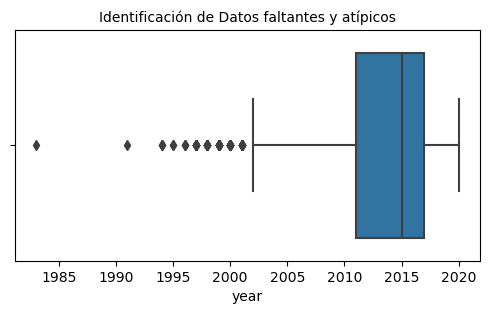

In [181]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['year'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

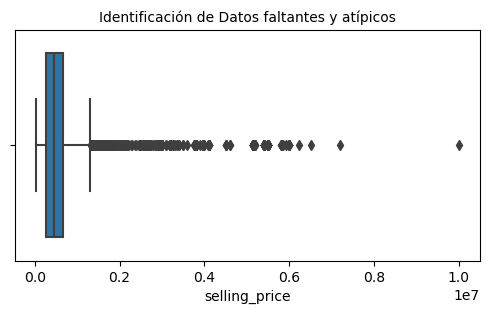

In [182]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['selling_price'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

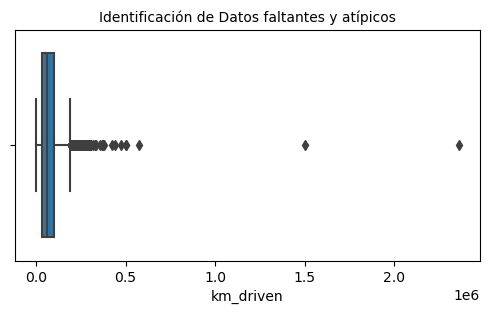

In [183]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['km_driven'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

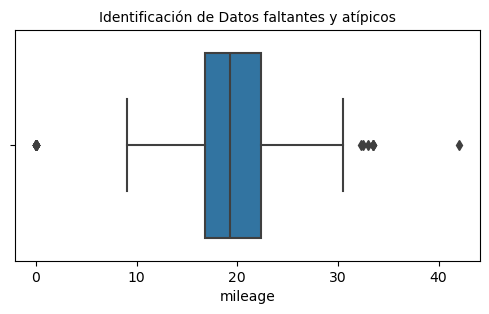

In [184]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['mileage'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

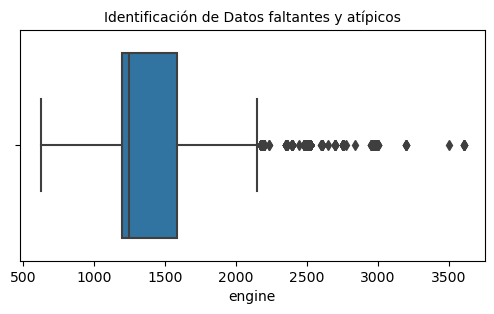

In [185]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['engine'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

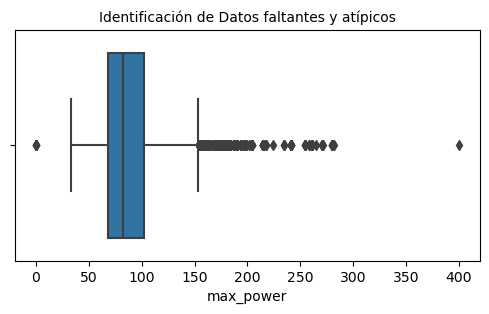

In [186]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['max_power'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

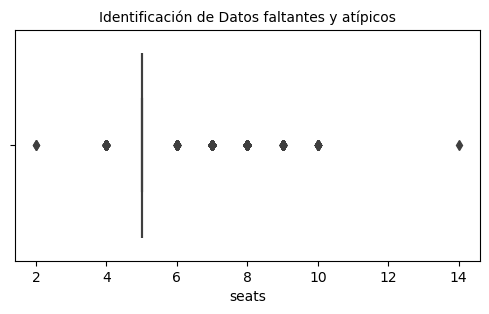

In [187]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['seats'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [ ]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [188]:
#Eliminación de datos nulos

Datos.dropna(inplace=True, axis=0, how='any')

Text(0.5, 0, 'Year')

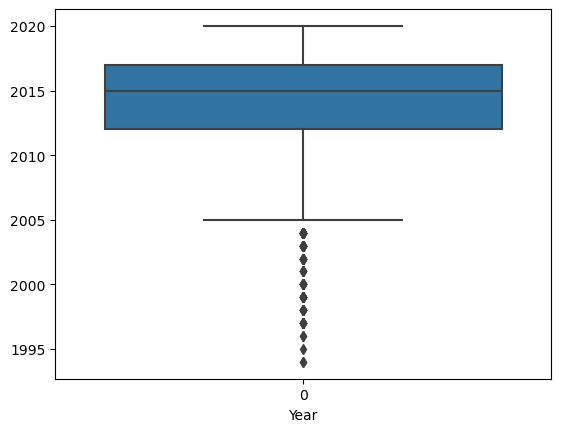

In [189]:
#Eliminación de datos atípicos

sns.boxplot(Datos['year'])
plt.xlabel('Year')

In [190]:
#Pueden haber autos viejos a la venta, osea, pueden haber autos del 90, 92 que se pueden vender y la gente los adquiere, por la antiguedad

Text(0.5, 0, 'Selling_Price')

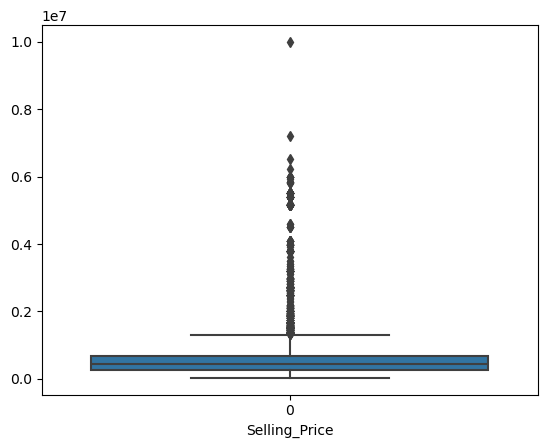

In [191]:
#Eliminación de datos atípicos

sns.boxplot(Datos['selling_price'])
plt.xlabel('Selling_Price')

In [192]:
#Para mi pueden haber autos demasiado costosos, como lo son los deportivos, por ende no hay necesidad de tratar esta variable

Text(0.5, 0, 'Km_Driven')

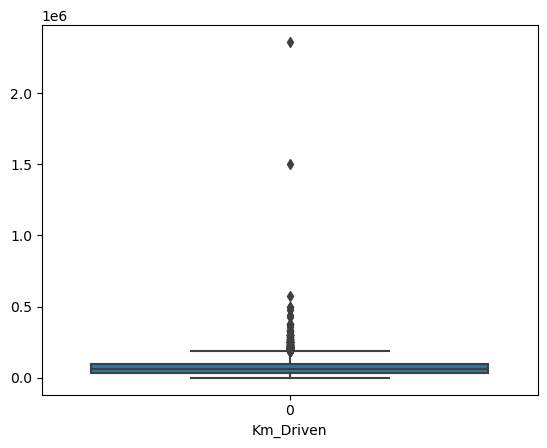

In [193]:
#Eliminación de datos atípicos

sns.boxplot(Datos['km_driven'])
plt.xlabel('Km_Driven')

In [194]:
#Para mi si hay autos que tienen kilometros conducidos demasiado altos, entonces no trataremos esta variable

Text(0.5, 0, 'Mileage')

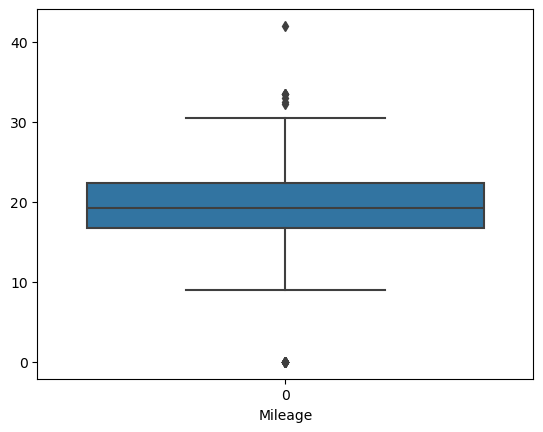

In [195]:
#Eliminación de datos atípicos

sns.boxplot(Datos['mileage'])
plt.xlabel('Mileage')

In [196]:
#Pueden haber autos con kilometraje alto pero vamos a tratar este dato

In [197]:
Datos.drop(Datos[Datos['mileage']<10].index,inplace=True)

Text(0.5, 0, 'Mileage')

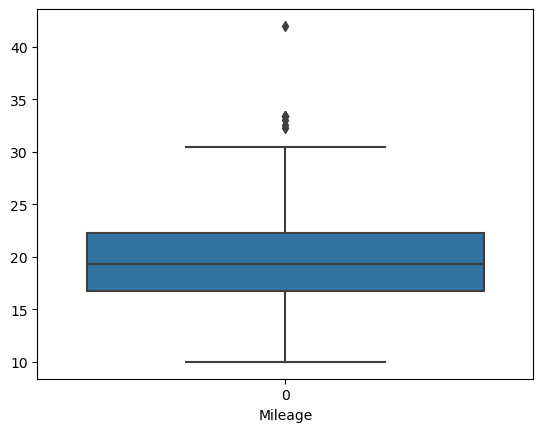

In [198]:
#Comprobación de eliminación de datos

sns.boxplot(Datos['mileage'])
plt.xlabel('Mileage')

Text(0.5, 0, 'Engine')

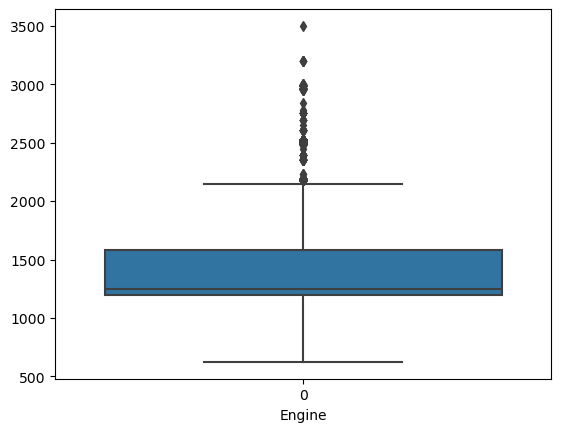

In [199]:
#Eliminación de datos atípicos

sns.boxplot(Datos['engine'])
plt.xlabel('Engine')

In [200]:
#Hay motores que tienen revoluciones demasiado altas, esta variable no se tratara

Text(0.5, 0, 'Max_Power')

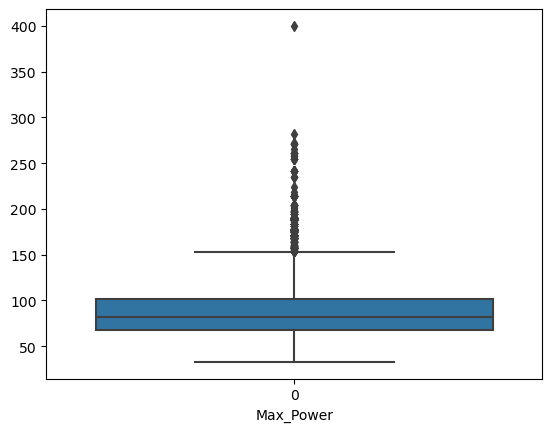

In [201]:
#Eliminación de datos atípicos

sns.boxplot(Datos['max_power'])
plt.xlabel('Max_Power')

In [202]:
#Pueden haber carros que tienen como potencia maxima muy altas

Text(0.5, 0, 'Seats')

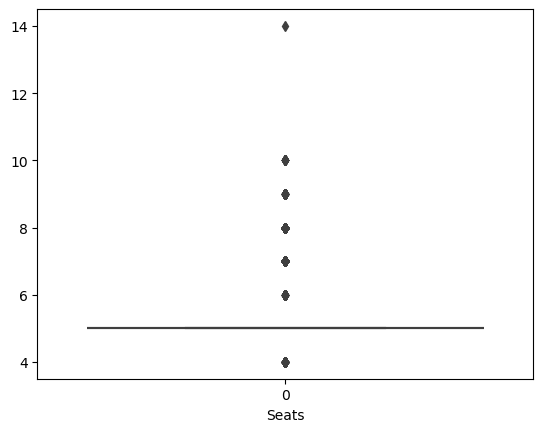

In [203]:
#Eliminación de datos atípicos

sns.boxplot(Datos['seats'])
plt.xlabel('Seats')

In [204]:
#Hay automoviles que cuentan con una cantidad grande de asientos en su interior, por lo que no se tratara esta variable

In [ ]:
#3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

    #Caracteristica de interes: selling_price que es el precio de venta

In [205]:
#Eliminación de variables categoricas y reemplazo de estas mismas por variables númericas

Datos.drop(Datos[Datos['owner']=='Test Drive Car'].index,inplace=True)

Datos.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3}},inplace=True)
Datos.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
Datos.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
Datos.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3}},inplace=True)

In [206]:
#Total de precio de venta de autos

Datos['selling_price'].value_counts()

selling_price
300000    221
600000    211
350000    204
550000    204
450000    194
         ... 
911999      1
94500       1
408000      1
654000      1
746000      1
Name: count, Length: 662, dtype: int64

In [207]:
Datos[['selling_price']].head(50)

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
5,440000
6,96000
7,45000
8,350000
9,200000


In [208]:
# Realizamos graficas comparando el dato de interes con los de mas datos.

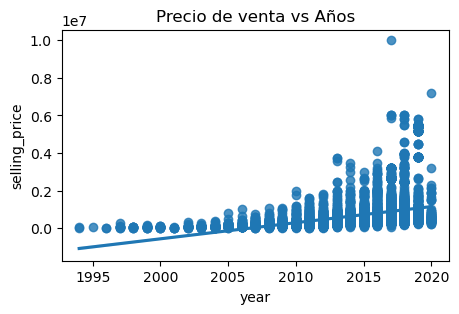

In [209]:
plt.figure(figsize = (5,3))
sns.regplot(x = 'year', y = 'selling_price', data = Datos)
plt.title('Precio de venta vs Años')

plt.show()

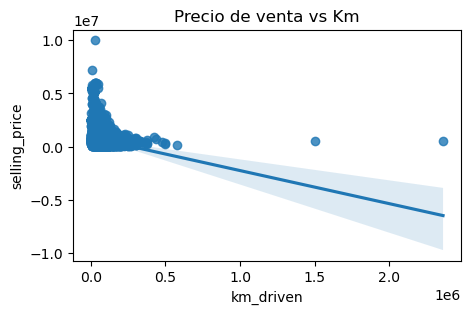

In [210]:
plt.figure(figsize = (5,3))
sns.regplot(x = 'km_driven', y = 'selling_price', data = Datos)
plt.title('Precio de venta vs Km')

plt.show()

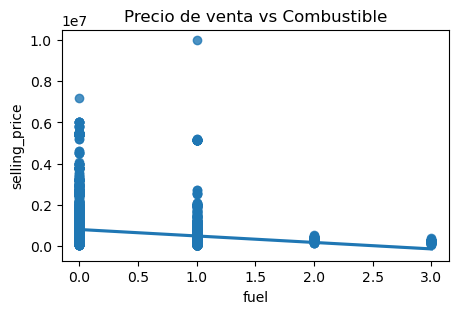

In [211]:
plt.figure(figsize = (5,3))
sns.regplot(x = 'fuel', y = 'selling_price', data = Datos)
plt.title('Precio de venta vs Combustible')

plt.show()

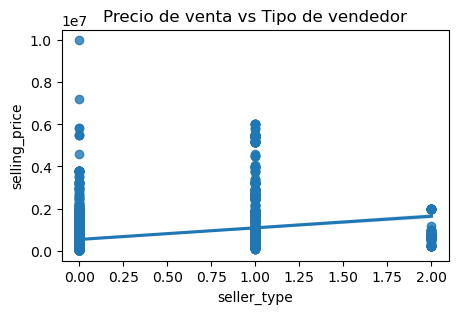

In [212]:
plt.figure(figsize = (5,3))
sns.regplot(x = 'seller_type', y = 'selling_price', data = Datos)
plt.title('Precio de venta vs Tipo de vendedor')

plt.show()

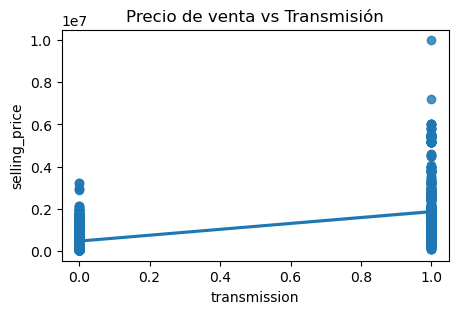

In [213]:
plt.figure(figsize = (5,3))
sns.regplot(x = 'transmission', y = 'selling_price', data = Datos)
plt.title('Precio de venta vs Transmisión')

plt.show()

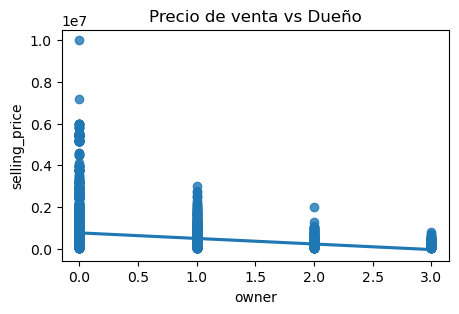

In [214]:
plt.figure(figsize = (5,3))
sns.regplot(x = 'owner', y = 'selling_price', data = Datos)
plt.title('Precio de venta vs Dueño')
plt.show()

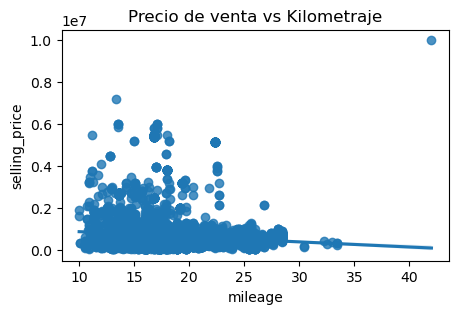

In [215]:
plt.figure(figsize = (5,3))
sns.regplot(x = 'mileage', y = 'selling_price', data = Datos)
plt.title('Precio de venta vs Kilometraje')

plt.show()

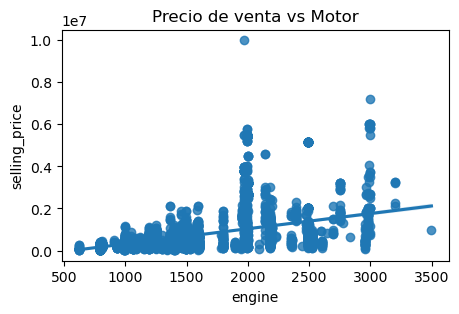

In [216]:
plt.figure(figsize = (5,3))
sns.regplot(x = 'engine', y = 'selling_price', data = Datos)
plt.title('Precio de venta vs Motor')

plt.show()

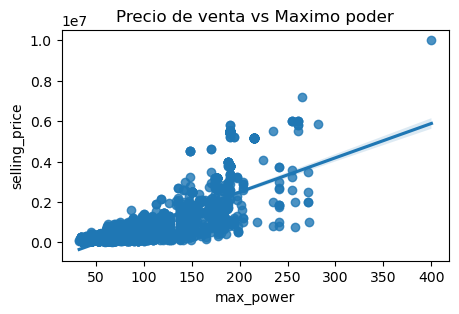

In [217]:
plt.figure(figsize = (5,3))
sns.regplot(x = 'max_power', y = 'selling_price', data = Datos)
plt.title('Precio de venta vs Maximo poder')

plt.show()

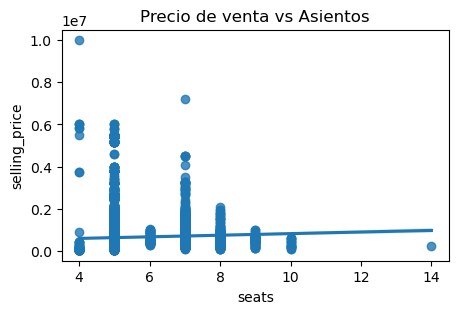

In [218]:
plt.figure(figsize = (5,3))
sns.regplot(x = 'seats', y = 'selling_price', data = Datos)
plt.title('Precio de venta vs Asientos')

plt.show()

In [219]:
#Eliminamos los datos que no queremos que aparescan en la grafica de correlación y realizamos la grafica de correlación

Datos.dtypes
Datos.drop(['name','torque'],axis=1,inplace=True)

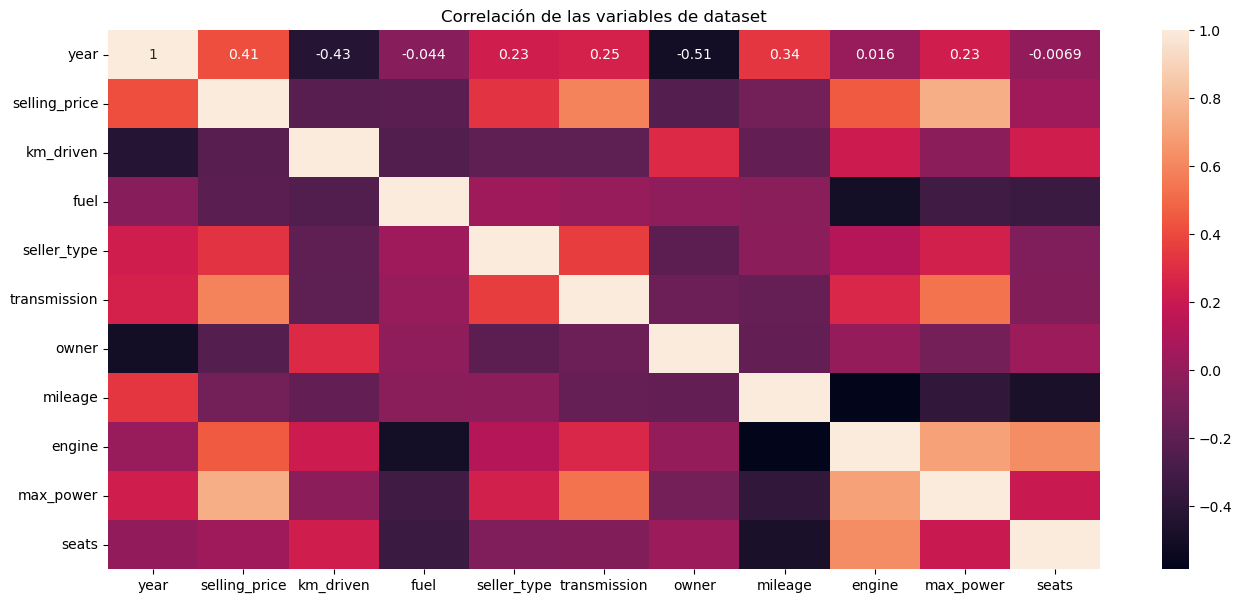

In [224]:
plt.figure(figsize = (16,7))
sns.heatmap(Datos.corr(), annot = True)
plt.title('Correlación de las variables de dataset')
plt.show()

In [ ]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [226]:
#Eliminamos algunos datos que no queremos en X y seleccionamos el dato que queremos en Y

X=Datos.drop(columns=['selling_price'],axis=1)
y=Datos['selling_price']

In [227]:
from sklearn.model_selection import train_test_split

#Crear variables X y Y para almacenar la información del entrenamiento

#Usamos la función train_test_split que nos permite realizar la división de un conjunto de datos

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=42, shuffle=False,)

In [228]:
print (X_train)

      year  km_driven  fuel  seller_type  transmission  owner  mileage  \
0     2014     145500     0            0             0      0    23.40   
1     2014     120000     0            0             0      1    21.14   
2     2006     140000     1            0             0      2    17.70   
3     2010     127000     0            0             0      0    23.00   
4     2007     120000     1            0             0      0    16.10   
...    ...        ...   ...          ...           ...    ...      ...   
6500  2018      43000     0            0             0      0    27.40   
6501  2007      60000     1            0             0      0    19.70   
6502  2012     148000     0            0             0      1    12.05   
6503  2014      70000     0            0             0      1    22.32   
6504  2011      96000     1            0             0      0    16.95   

      engine  max_power  seats  
0     1248.0      74.00    5.0  
1     1498.0     103.52    5.0  
2     1497.0

In [229]:
print (Y_train)

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
6500    700000
6501    135000
6502    430000
6503    625000
6504    280000
Name: selling_price, Length: 6299, dtype: int64


In [ ]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [230]:
#Construir el modelo de regresión logística

model_logistic_regression=LinearRegression() #liblinear es una libreria para resolver problemas lineales de clasificación y regresión
model_logistic_regression.fit(X_train, Y_train)

#Creamos el modelo de predicción

Prediccion=model_logistic_regression.predict(X_test) #La función predict predice los valores a partir del conjunto de datos

In [231]:
print (Y_test)

6505    800000
6506    220000
6507    620000
6508    300000
6509    180000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 1575, dtype: int64


In [232]:
print(Prediccion)

[928770.94861431 339295.77118003 587278.59904577 ... 143882.58436242
 401608.37131619 401608.37131619]


In [ ]:
#6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [235]:
#Desempeño del modelo de regresión

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(Y_test, Prediccion))
r2 = r2_score(Y_test, Prediccion)

print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error: 464059.17305621045
R^2 Score: 0.6504886535081614


In [ ]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

Text(0, 0.5, 'Y_test')

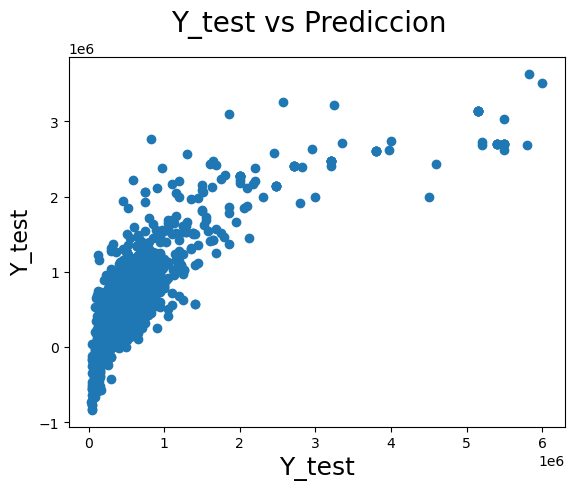

In [236]:
# Trazar y_test e y_pred para comprender la propagación.

fig = plt.figure()
plt.scatter(Y_test,Prediccion)
fig.suptitle('Y_test vs Prediccion', fontsize=20)              # Título de la trama
plt.xlabel('Y_test', fontsize=18)                          # X-label
plt.ylabel('Y_test', fontsize=16)                          # Y-label